In [2]:
! pip install opencv-python scikit-image numpy matplotlib seaborn pandas



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os, shutil
import cv2
import skimage
import skimage.segmentation
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")



In [4]:
# labels =["PNEUMONIA","NORMAL"]

# img_size = 128

# def get_data() :
#   data =[]
#   for label in labels:

#     path = os.path.join(data_dir, label)
#     class_num = labels.index(label)

labels =["PNEUMONIA","NORMAL"] # INDEX --> 0, 1

img_size = 128

def get_data(data_dir) :
  data =[]
  for label in labels:

    path = os.path.join(data_dir, label)
    class_num = labels.index(label)

    for img in os.listdir(path) :
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
        data.append([resized_arr, class_num])  # [[....ANY NUMBER] ,0/1]
      except Exception as e:
        print(e)
  return data

In [5]:
train = get_data("C:/Users/Hp/OneDrive/Desktop/pneumonia-disease-detection using deep learning/pneumonia-dataset/train")
test = get_data("C:/Users/Hp/OneDrive/Desktop/pneumonia-disease-detection using deep learning/pneumonia-dataset/test")
val = get_data("C:/Users/Hp/OneDrive/Desktop/pneumonia-disease-detection using deep learning/pneumonia-dataset/val")



In [6]:
pneumonia = os.listdir("C:/Users/Hp/OneDrive/Desktop/pneumonia-disease-detection using deep learning/pneumonia-dataset/train/PNEUMONIA")

pneumonia_dir = "C:/Users/Hp/OneDrive/Desktop/pneumonia-disease-detection using deep learning/pneumonia-dataset/train/PNEUMONIA"

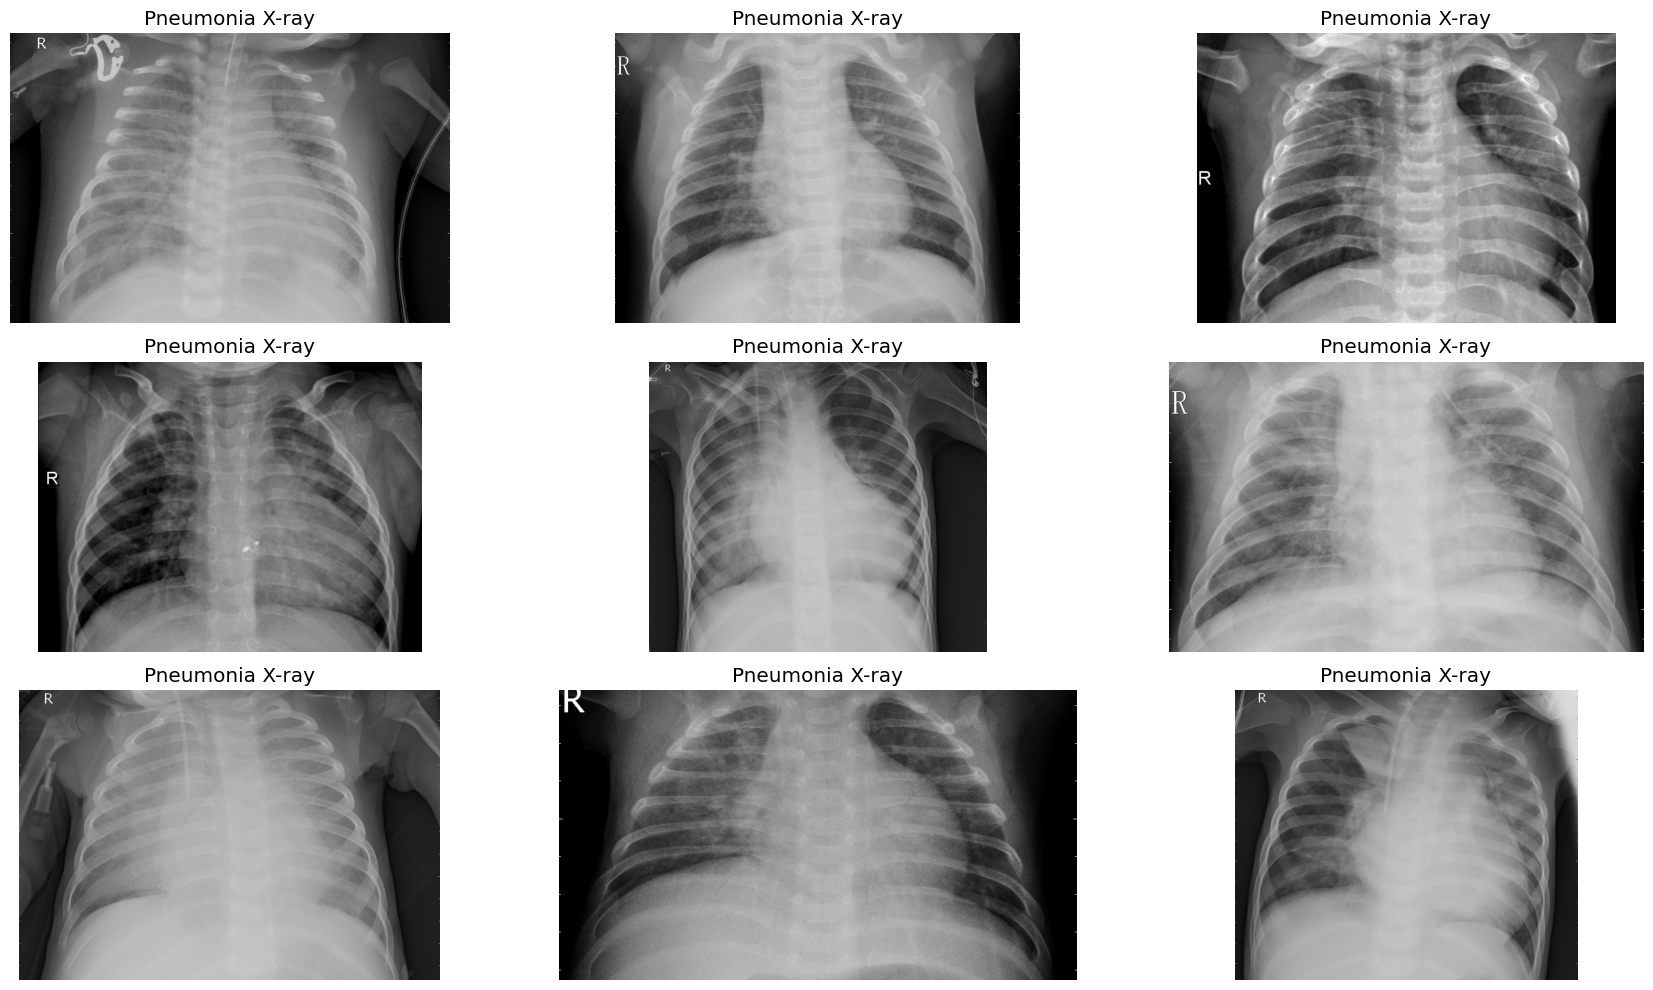

In [7]:
plt.figure(figsize=(20,10))
for i in range(9) :
  plt.subplot(3,3,i+1)
  img = plt.imread(os.path.join(pneumonia_dir,pneumonia[i])) # folde-name + file name = pura path ban gaya folder ka
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.title("Pneumonia X-ray")

  plt.tight_layout()


In [8]:
normal = os.listdir("C:/Users/Hp/OneDrive/Desktop/pneumonia-disease-detection using deep learning/pneumonia-dataset/train/NORMAL")

normal_dir = "C:/Users/Hp/OneDrive/Desktop/pneumonia-disease-detection using deep learning/pneumonia-dataset/train/NORMAL"



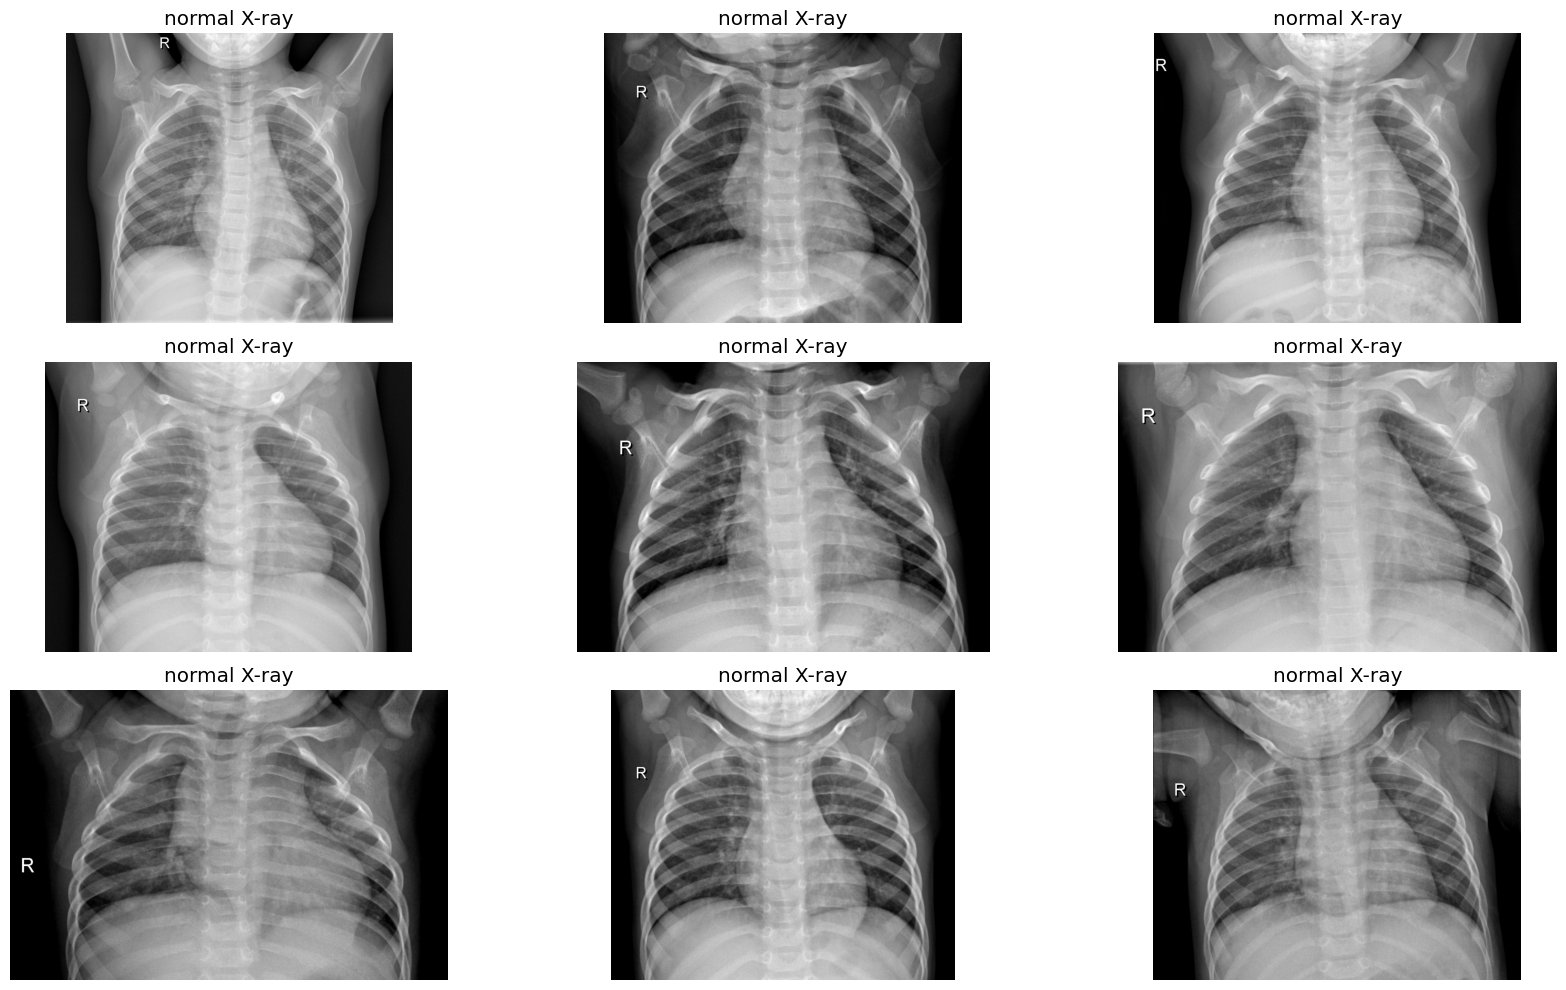

In [9]:
plt.figure(figsize=(20,10))
for i in range(9) :
  plt.subplot(3,3,i+1)
  img = plt.imread(os.path.join(normal_dir, normal[i])) # folde-name + file name = pura path ban gaya folder ka
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.title("normal X-ray")

  plt.tight_layout()


<Axes: xlabel='count'>

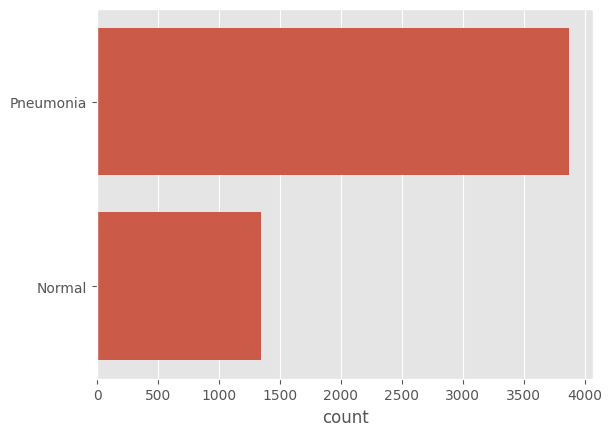

In [10]:
listx = []
for i in train :
  if(i[1]==0):
      listx.append("Pneumonia")

  else:
    listx.append("Normal")
sns.countplot(listx)






In [11]:
# Data Augmentaion & Resizing

In [12]:
! pip install tensorflow keras numpy pandas matplotlib scikit-learn
    


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout, MaxPool2D , BatchNormalization
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.activations import swish
from tensorflow.keras.regularizers import l2


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [14]:



from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjusted brightness range
    fill_mode="nearest"
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)






ye keras Imagedatagenerator ka ek part hai , jo images ko augment , preprocess aur batch wise load karta hai . 


augment > augmentation me hum existing inmages ko modify karke naye 
variations create karna  , so that model zyada generalize ho sake aur overfitting na ho.

Jab hum ImageDataGenerator ka use karte hain, to hum data augmentation apply kar sakte hain. Isme images ko rotate, flip, zoom, crop, ya color change kiya ja sakta hai.

-> Data Augmentation Kyun Zaroori Hai?

✔ Zyada Data Create Karna: Jab dataset chhota ho, to augmentation se naye images banakar training data ko bada sakte hain.

✔ Overfitting Avoid Karna: Model agar sirf original images se train hota hai, to wo sirf wahi patterns yaad karega. Augmentation model ko zyada generalize hone me help karta hai.

✔ Robust Model: Model different angles, brightness, zoomed-in ya flipped images ko bhi correctly predict kar sakega.
important last point 

conclusion  : 

Data Augmentation = Images modify karke naye variations banana ✅
✔ Model ko zyada generalized banata hai
✔ Overfitting ko reduce karta hai
✔ Chhote dataset me bhi better performance deta hai




yeh images ko batches me  load karta hai , shuffle karta hai aur augment kar sakta hai. 

Deep Learning models ko efficiently train karne ke liye 
dataset prepare karna. 

In [15]:
train_generator = train_datagen.flow_from_directory("C:/Users/Hp/OneDrive/Desktop/pneumonia-disease-detection using deep learning/pneumonia-dataset/train",batch_size=16, 
    target_size=(128,128), class_mode="categorical",shuffle=True,seed = 42, color_mode="rgb")

Found 5216 images belonging to 2 classes.


In [16]:
valid_generator = valid_datagen.flow_from_directory("C:/Users/Hp/OneDrive/Desktop/pneumonia-disease-detection using deep learning/pneumonia-dataset/val",batch_size=16,
    target_size=(128,128), class_mode="categorical",shuffle=True,seed = 42, color_mode="rgb")

# generator apply kar raha he toh seed use kar raha he toh shuffle = True kar raha he


Found 16 images belonging to 2 classes.


In [17]:
class_labels = train_generator.class_indices 

class_labels 

{'NORMAL': 0, 'PNEUMONIA': 1}

In [18]:
class_name = {value:key for (key,value) in class_labels.items()}
# flip kar rahe he 

class_name

{0: 'NORMAL', 1: 'PNEUMONIA'}

In [19]:
# VGG 19 CNN ARCHITECTURE 
# HERE WE USE VGG19 ARCHITECTURE FOR OUR MODEL 


In [20]:
base_model = VGG19(input_shape=(128,128,3),
                   include_top=False,
                   weights="imagenet")

# for layer in base_model.layers:    # Feature extraction ke liye convolutional layers freeze kar di.

#     layer.trainable = False  # isme hum freze kar rahe he layer ko , jis se weight 
#                     #    update na ho aur humara model jaldi train ho jaye 

# now we , freeze all layers except last 5
for layer in base_model.layers[:-5]:   
    layer.trainable = False  # Freeze initial layers

for layer in base_model.layers[-5:]:  
    layer.trainable = True   ### unfreeze last 5 layers for training

x = base_model.output

flat = Flatten()(x)  # vgg ka output flatten kiya 

fc1 = Dense(1024, activation="relu", kernel_regularizer=l2(0.0005))(flat)
bn1 = BatchNormalization()(fc1)
d1 = Dropout(0.4)(bn1)  

fc2 = Dense(512, activation="relu", kernel_regularizer=l2(0.0005))(d1)
bn2 = BatchNormalization()(fc2)  
d2 = Dropout(0.25)(bn2)      

# Output Layer (Softmax for 2-class classification)
output = Dense(2, activation="softmax")(d2)

# Define the model
model_01 = Model(inputs=base_model.inputs, outputs=output)

# Show the model summary
model_01.summary()

# VGG KO FLAT KAR HE , AUR FC1 KO INPUT DE RAHE HE 


# fc1 = Dense(1024, activation="relu")(flat)

# d1 = Dropout(0.4)(fc1) 

# fc2 = Dense(512, activation="relu")(d1)

# d2 = Dropout(0.3)(fc2) 

# output = Dense(2, activation ="softmax")(d2)


# model_01 = Model(base_model.inputs, output)

# model_01.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,09

 Total params: 28,945,986 (110.42 MB)

 Trainable params: 18,357,762 (70.03 MB)

 Non-trainable params: 10,588,224 (40.39 MB)

# # here also let we do some changes to improve the accuracy of the model 


In [21]:
# flatten se pehle ka jo parameter he vo he 20,024,384# non trainable parameters he 
# 360,000,000,000 ; itne parameters chat gpt me use hote he 

In [22]:
file_path = "model.keras"

# Early Stopping (Stop training if val_loss doesn't improve for 5 epochs)
es = EarlyStopping(monitor="val_loss", mode="min", patience=10, restore_best_weights=True, verbose=1)

# Save the best model based on val_loss
checkpoint = ModelCheckpoint(file_path, monitor="val_loss", verbose=1, save_best_only=True, mode="min", save_weights_only=False, save_freq="epoch")

# Reduce LR if model stops improving
lrr = ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, verbose=1, mode="min", min_lr=1e-6)

# Optimizer (SGD with Nesterov Momentum)
sgd = SGD(learning_rate=0.00020, momentum=0.9, nesterov=True, decay=1e-6)

# Compile model with correct loss function for binary classification
model_01.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["accuracy"])



c:\Users\Hp\OneDrive\Desktop\pneumonia-disease-detection using deep learning\pvenv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [23]:

# # train_generator is used to train the model and valid_generator is used to validate the model

# # output > history object ayega -> isme trainig  metrics hoga , loss hoga , validation metrics hoga , validation loss hoga 

# # steps_per_epoch = 50 , 50 images ko ek epoch me pass karega
# # epochs = 1 , 1 epoch me 50 images pass karega  , 50 images pass karne ke baad ek epoch


# Get dataset sizes
total_train_samples = train_generator.samples
total_valid_samples = valid_generator.samples
batch_size = train_generator.batch_size

# Adjust steps_per_epoch and validation_steps
steps_per_epoch = total_train_samples // batch_size
validation_steps = total_valid_samples // batch_size

history = model_01.fit(
    train_generator, 
    validation_data=valid_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=15,  # Increased for better learning
    callbacks=[es, checkpoint, lrr], 
    verbose=1
)




c:\Users\Hp\OneDrive\Desktop\pneumonia-disease-detection using deep learning\pvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


c:\Users\Hp\OneDrive\Desktop\pneumonia-disease-detection using deep learning\pvenv\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7404 - loss: 1.8789
Epoch 1: val_loss improved from inf to 1.71603, saving model to model.keras
326/326 ━━━━━━━━━━━━━━━━━━━━ 922s 3s/step - accuracy: 0.7407 - loss: 1.8785 - val_accuracy: 0.6875 - val_loss: 1.7160 - learning_rate: 2.0000e-04
Epoch 2/15
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8878 - loss: 1.6361
Epoch 2: val_loss did not improve from 1.71603
326/326 ━━━━━━━━━━━━━━━━━━━━ 1405s 4s/step - accuracy: 0.8878 - loss: 1.6361 - val_accuracy: 0.7500 - val_loss: 1.8317 - learning_rate: 2.0000e-04
Epoch 3/15
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9111 - loss: 1.5463
Epoch 3: val_loss improved from 1.71603 to 1.67831, saving model to model.keras
326/326 ━━━━━━━━━━━━━━━━━━━━ 690s 2s/step - accuracy: 0.9111 - loss: 1.5463 - val_accuracy: 0.8125 - val_loss: 1.6783 - learning_rate: 2.0000e-04
Epoch 4/15
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9197 - loss: 1.5263
Epoch 4: val_loss did not imp

In [36]:
test_generator = test_datagen.flow_from_directory("C:/Users/Hp/OneDrive/Desktop/pneumonia-disease-detection using deep learning/pneumonia-dataset/test",batch_size=16,
    target_size=(128,128), class_mode="categorical",shuffle=True,seed = 42, color_mode="rgb")

# generator apply kar raha he toh seed use kar raha he toh shuffle = True kar raha he


Found 624 images belonging to 2 classes.


In [37]:
import os

# Check if directory exists, if not, create it
if not os.path.isdir("model_weights/"):  
    os.mkdir("model_weights/")

# Save the model
model_01.save(filepath="model_weights/vgg19_models_01.h5", overwrite=True)


test_generator = test_datagen.flow_from_directory("C:/Users/Hp/OneDrive/Desktop/pneumonia-disease-detection using deep learning/pneumonia-dataset/test",batch_size=16,
    target_size=(128,128), class_mode="categorical",shuffle=True,seed = 42, color_mode="rgb")

In [38]:
model_01.load_weights("model_weights/vgg19_models_01.h5")

vgg_val_eval_01 = model_01.evaluate(valid_generator) # evaluate the model on validation data

vgg_test_eval_01 = model_01.evaluate(test_generator) # evaluate the model on test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8125 - loss: 1.6783
39/39 ━━━━━━━━━━━━━━━━━━━━ 27s 688ms/step - accuracy: 0.8921 - loss: 1.5988


In [39]:
print(f"validation loss" ,{vgg_val_eval_01[0]})

print(f"validation accuracy" ,{vgg_val_eval_01[1]})

print(f"test loss",{vgg_test_eval_01[0]}) 
print(f"test accuracy",{vgg_test_eval_01[1]})   


validation loss {1.6783069372177124}
validation accuracy {0.8125}
test loss {1.5612374544143677}
test accuracy {0.9102563858032227}


# unfrozen weights 


In [40]:
# Save full model (including unfrozen weights)
model_01.save("model_weights/vgg_unfrozen.h5", overwrite=True)


In [41]:
# Save full model (including unfrozen weights)
model_01.save("model_weights/vgg_unfrozen.h5", overwrite=True)


In [42]:
from tensorflow.keras.models import load_model

loaded_model = load_model("model_weights/vgg_unfrozen.h5")
loaded_model.summary()  # Check layers and trainable params


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,09

 Total params: 28,945,988 (110.42 MB)

 Trainable params: 18,357,762 (70.03 MB)

 Non-trainable params: 10,588,224 (40.39 MB)

 Optimizer params: 2 (12.00 B)

In [43]:
for layer in loaded_model.layers:
    print(layer.name, "Trainable:", layer.trainable)


input_layer Trainable: True
block1_conv1 Trainable: False
block1_conv2 Trainable: False
block1_pool Trainable: False
block2_conv1 Trainable: False
block2_conv2 Trainable: False
block2_pool Trainable: False
block3_conv1 Trainable: False
block3_conv2 Trainable: False
block3_conv3 Trainable: False
block3_conv4 Trainable: False
block3_pool Trainable: False
block4_conv1 Trainable: False
block4_conv2 Trainable: False
block4_conv3 Trainable: False
block4_conv4 Trainable: False
block4_pool Trainable: False
block5_conv1 Trainable: True
block5_conv2 Trainable: True
block5_conv3 Trainable: True
block5_conv4 Trainable: True
block5_pool Trainable: True
flatten Trainable: True
dense Trainable: True
batch_normalization Trainable: True
dropout Trainable: True
dense_1 Trainable: True
batch_normalization_1 Trainable: True
dropout_1 Trainable: True
dense_2 Trainable: True


In [58]:
# # Unfreeze block5 layers
# for layer in loaded_model.layers:
#     if "block5" in layer.name:
#         layer.trainable = True

# # Compile model again
# from tensorflow.keras.optimizers import Adam

# loaded_model.compile(optimizer=Adam(learning_rate=0.0001), 
#                      loss="categorical_crossentropy", 
#                      metrics=["accuracy"])

# # Save again
# loaded_model.save("model_weights/vgg_unfrozen_fixed.h5", overwrite=True)



from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Model ko load karo bina compilation ke
loaded_model = load_model("model_weights/vgg_unfrozen_fixed.h5", compile=False)

# Model ko Adam optimizer ke sath compile karo
loaded_model.compile(optimizer=Adam(learning_rate=0.0001), 
                     loss="categorical_crossentropy", 
                     metrics=["accuracy"])

# Model ko dubara save karo bina training ke
loaded_model.save("model_weights/vgg_unfrozen_fixed.h5", overwrite=True)


In [59]:
for layer in loaded_model.layers:
    print(layer.name, "Trainable:", layer.trainable)


input_layer Trainable: True
block1_conv1 Trainable: False
block1_conv2 Trainable: False
block1_pool Trainable: False
block2_conv1 Trainable: False
block2_conv2 Trainable: False
block2_pool Trainable: False
block3_conv1 Trainable: False
block3_conv2 Trainable: False
block3_conv3 Trainable: False
block3_conv4 Trainable: False
block3_pool Trainable: False
block4_conv1 Trainable: False
block4_conv2 Trainable: False
block4_conv3 Trainable: False
block4_conv4 Trainable: False
block4_pool Trainable: False
block5_conv1 Trainable: True
block5_conv2 Trainable: True
block5_conv3 Trainable: True
block5_conv4 Trainable: True
block5_pool Trainable: True
flatten Trainable: True
dense Trainable: True
batch_normalization Trainable: True
dropout Trainable: True
dense_1 Trainable: True
batch_normalization_1 Trainable: True
dropout_1 Trainable: True
dense_2 Trainable: True


In [60]:
! pip install numpy

In [61]:
import numpy as np 

arr = [224,20,30,40]
print(arr)


[224, 20, 30, 40]


In [62]:
arr = np.array(arr)

print(arr)
print(arr/255.0)

[224  20  30  40]
[0.87843137 0.07843137 0.11764706 0.15686275]


In [63]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [64]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg19 import VGG19


In [65]:
from tensorflow.keras.models import load_model

model = load_model("model_weights/vgg_unfrozen.h5")
model.summary()  # Check layers and trainable params


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,09

 Total params: 28,945,988 (110.42 MB)

 Trainable params: 18,357,762 (70.03 MB)

 Non-trainable params: 10,588,224 (40.39 MB)

 Optimizer params: 2 (12.00 B)

In [66]:
model = load_model("model_weights/vgg_unfrozen_fixed.h5")
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,09

 Total params: 28,945,988 (110.42 MB)

 Trainable params: 18,357,762 (70.03 MB)

 Non-trainable params: 10,588,224 (40.39 MB)

 Optimizer params: 2 (12.00 B)

In [67]:
for layer in model.layers:
    print(layer.name, "Trainable:", layer.trainable)


input_layer Trainable: True
block1_conv1 Trainable: False
block1_conv2 Trainable: False
block1_pool Trainable: False
block2_conv1 Trainable: False
block2_conv2 Trainable: False
block2_pool Trainable: False
block3_conv1 Trainable: False
block3_conv2 Trainable: False
block3_conv3 Trainable: False
block3_conv4 Trainable: False
block3_pool Trainable: False
block4_conv1 Trainable: False
block4_conv2 Trainable: False
block4_conv3 Trainable: False
block4_conv4 Trainable: False
block4_pool Trainable: False
block5_conv1 Trainable: True
block5_conv2 Trainable: True
block5_conv3 Trainable: True
block5_conv4 Trainable: True
block5_pool Trainable: True
flatten Trainable: True
dense Trainable: True
batch_normalization Trainable: True
dropout Trainable: True
dense_1 Trainable: True
batch_normalization_1 Trainable: True
dropout_1 Trainable: True
dense_2 Trainable: True


In [68]:
model.save("model_weights/vgg_unfrozen_fixed.h5", overwrite=True)


In [69]:
model.save("model_weights/vgg_unfrozen_fixed.keras")


In [70]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("model_weights/vgg_unfrozen_fixed.keras")

# Print model summary to verify layers and trainable parameters
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,09

 Total params: 47,303,750 (180.45 MB)

 Trainable params: 18,357,762 (70.03 MB)

 Non-trainable params: 10,588,224 (40.39 MB)

 Optimizer params: 18,357,764 (70.03 MB)

In [71]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("model_weights/vgg_unfrozen_fixed.keras")

# Print model summary to verify layers and trainable parameters
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,09

 Total params: 47,303,750 (180.45 MB)

 Trainable params: 18,357,762 (70.03 MB)

 Non-trainable params: 10,588,224 (40.39 MB)

 Optimizer params: 18,357,764 (70.03 MB)